In [1]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd

/home1/efeghhi/.conda/envs/env3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
def plot_MI_dist(gamma_type, clust_type, by_elec, recalled):
    
    if by_elec:
        file_id = 'by_elec'
    else:
        file_id = 'by_subj'
        
    if recalled:
        print("Plotting recalled data")
        recall_str = 'recalled'
    else:
        recall_str = ''
    
    dist = pd.DataFrame(dict(np.load(f'saved_results/{gamma_type}_dist_{file_id}_{clust_type}{recall_str}.npz')))
    MI = dict(np.load(f'saved_results/{gamma_type}_MI_{file_id}_{clust_type}{recall_str}.npz'))
    MI_z = dict(np.load(f'saved_results/{gamma_type}_MI_{file_id}_z_{clust_type}{recall_str}.npz'))
    pvals = dict(np.load(f'saved_results/{gamma_type}_MI_p_vals_{file_id}_{clust_type}{recall_str}.npz'))
    
    if by_elec:
        MI_clean = pd.DataFrame({k: float(v) for k, v in MI.items()}, index=['MI'])
        MI_df = MI_clean.T
        MI_z_clean = pd.DataFrame({k: float(v) for k, v in MI_z.items()}, index=['MI_z'])
        MI_z_df = MI_z_clean.T
        p_clean = pd.DataFrame({k: float(v) for k, v in pvals.items()}, index=['Pvals'])
        p_vals_df = p_clean.T
    else:
        MI_clean = pd.DataFrame({k: v for k, v in MI.items() if len(v)!=0})
        MI_df = MI_clean.T

        MI_z_clean = pd.DataFrame({k: v for k, v in MI_z.items() if len(v)!=0})
        MI_z_df = MI_z_clean.T
 
    dist.index *= 20
    df = dist.T
    df['MaxIndex'] = np.argmax(df.values, axis=1)
    sorted_df = df.sort_values(by='MaxIndex')
    sorted_df = sorted_df.drop('MaxIndex', axis=1)
    
    MI_z_sig = MI_z_df[MI_z_df.values >= 1.96]
    p_sig = p_vals_df[p_vals_df.values < 0.05]
    print("Fraction of sig p vals: ", p_sig.shape[0]/p_vals_df.shape[0])
    df_filtered = sorted_df.loc[p_sig.index]
    df_filtered_by_MI = sorted_df.loc[MI_z_sig.index]

    plt.figure(figsize=(12,12))
    sns.heatmap(sorted_df, vmin=0.035, vmax=0.10)
    plt.title(f"Gamma dist by theta phase, {clust_type}, {gamma_type}")
    plt.savefig(f'figures/{file_id}_{gamma_type}_dist_{clust_type}_{recall_str}', bbox_inches='tight')
    plt.show()
    
    plt.figure(figsize=(8,6))
    sns.heatmap(df_filtered, vmin=0.04, vmax=.075)
    plt.title(f"Gamma dist by theta phase, {clust_type}, {gamma_type}")
    plt.savefig(f'figures/{file_id}_{gamma_type}_dist_{clust_type}_sig_{recall_str}', bbox_inches='tight')
    plt.show()
    
    MI_df = MI_df.reindex(sorted_df.index)
    plt.figure(figsize=(2,10))
    sns.heatmap(MI_df)
    plt.title(f"MI values, {clust_type}, {gamma_type}")
    plt.savefig(f'figures/{file_id}_{gamma_type}_MI_{clust_type}_{recall_str}', bbox_inches='tight')
    plt.show()
    dist.index*=20
    
    
    pvals = p_vals_df.reindex(p_vals_df.index)
    plt.figure(figsize=(2,10))
    sns.heatmap(pvals)
    plt.title(f"P vals, {clust_type}, {gamma_type}")
    plt.savefig(f'figures/{file_id}_{gamma_type}_pvals_{clust_type}_{recall_str}', bbox_inches='tight')
    plt.show()
    
    '''
    MI_z_df = MI_z_df.reindex(sorted_df.index)
    plt.figure(figsize=(2,10))
    sns.heatmap(MI_z_df)
    plt.title(f"MI z-values, {clust_type}, {gamma_type}")
    plt.savefig(f'figures/{file_id}_{gamma_type}_MI_z_{clust_type}', bbox_inches='tight')
    plt.show()
    '''

Fraction of sig p vals:  0.12903225806451613


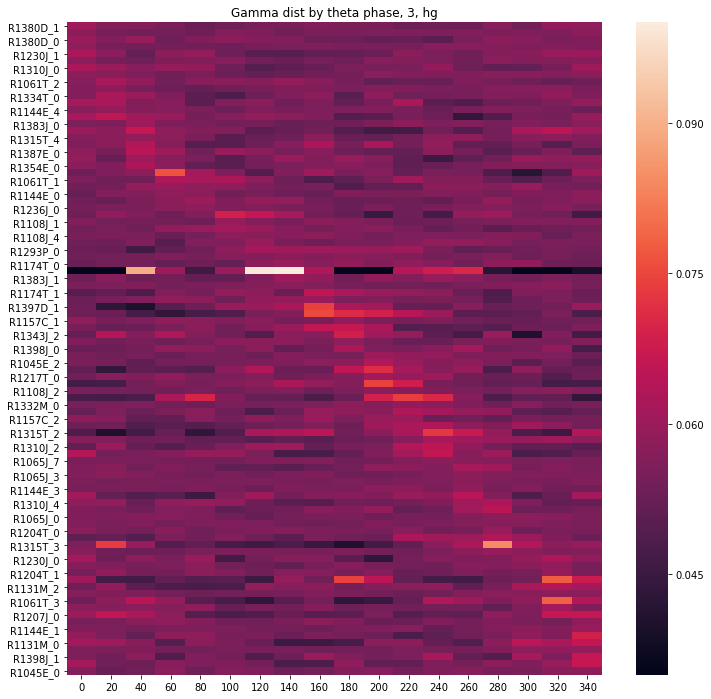

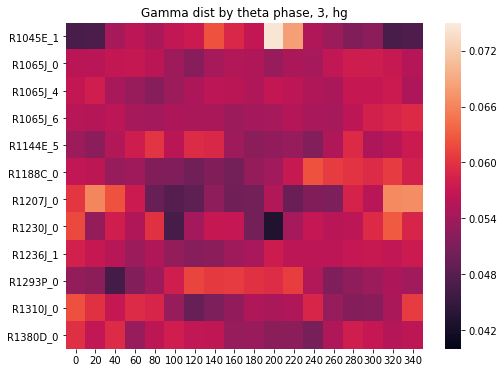

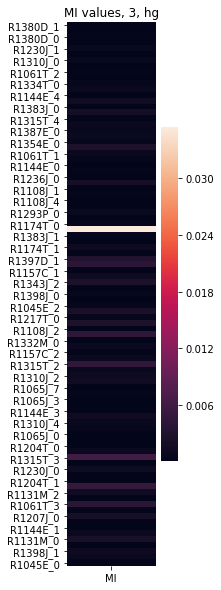

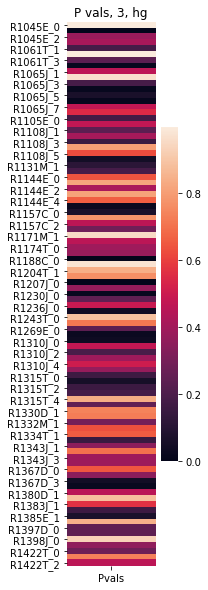

In [4]:
plot_MI_dist('hg', 3, True, False)

Fraction of sig p vals:  0.08653846153846154


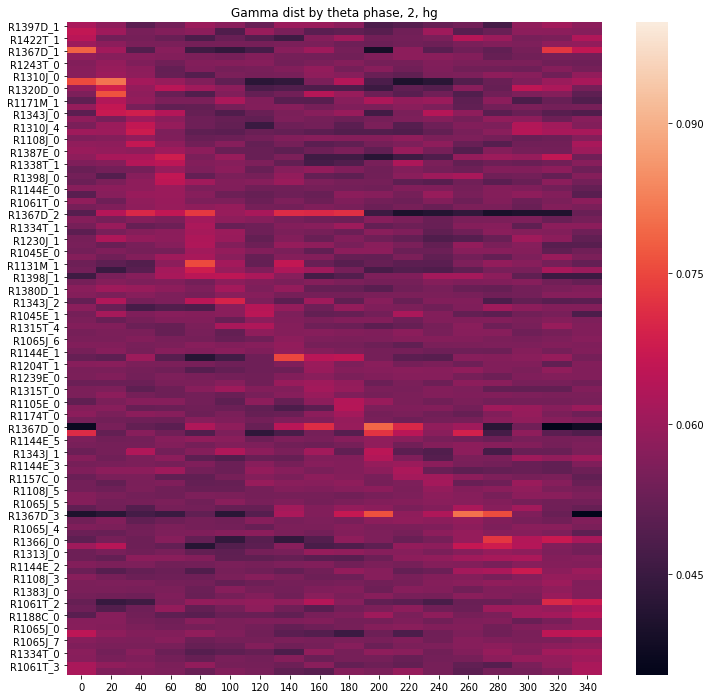

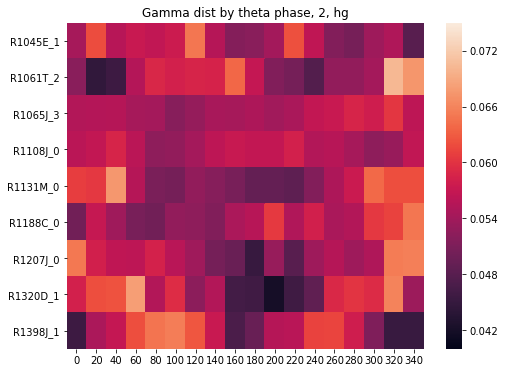

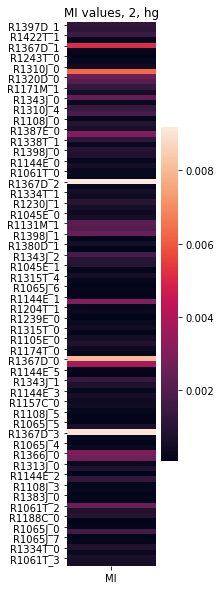

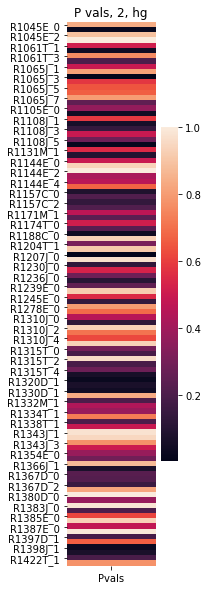

In [16]:
plot_MI_dist('hg', 2, True, recalled=False)

Fraction of sig p vals:  0.06451612903225806


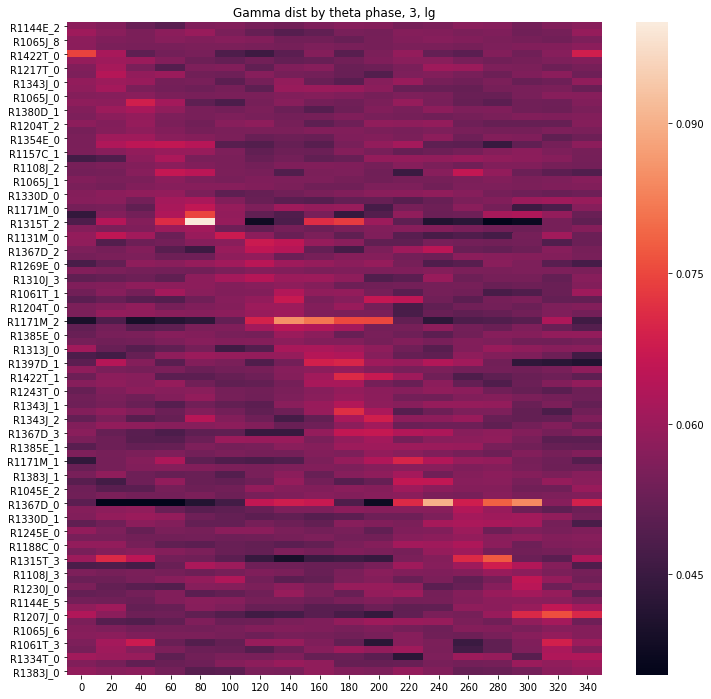

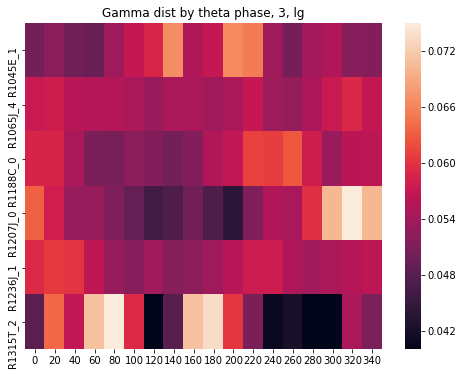

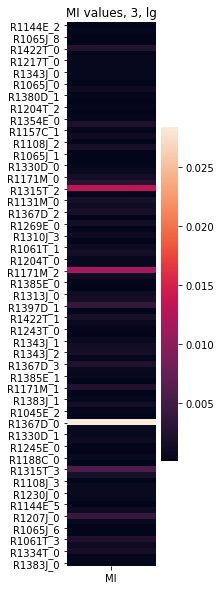

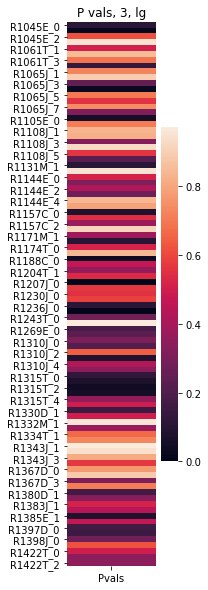

In [9]:
plot_MI_dist('lg', 3, True, recalled=False)

Fraction of sig p vals:  0.07692307692307693


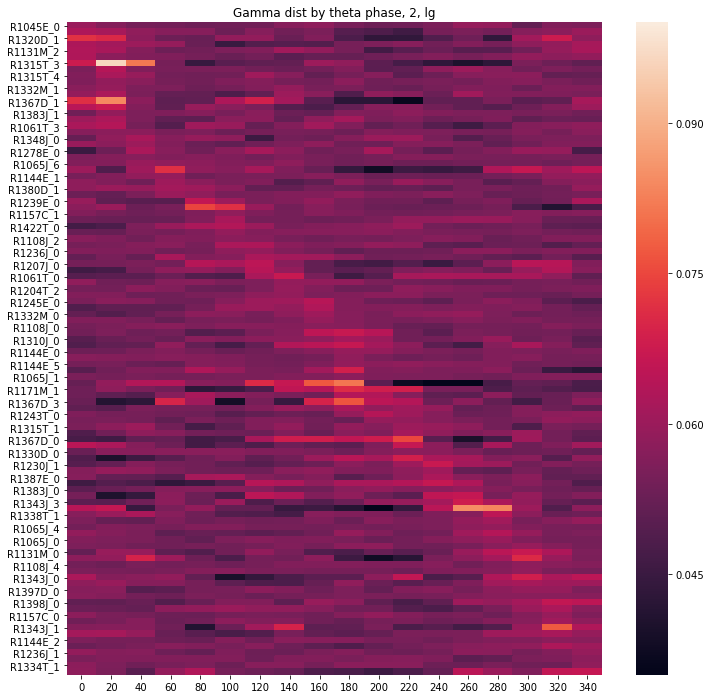

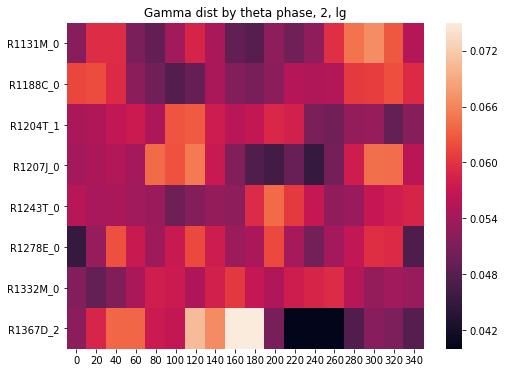

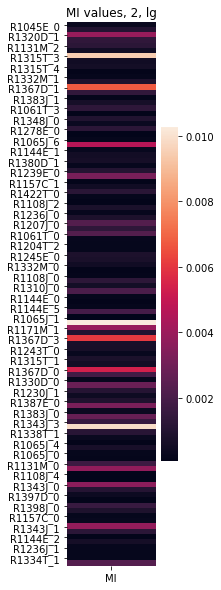

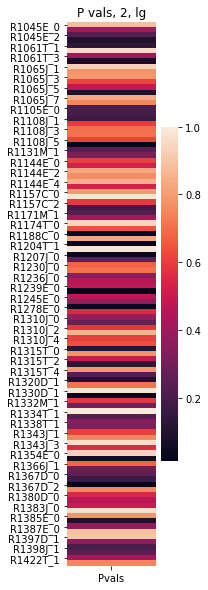

In [10]:
plot_MI_dist('lg', 2, True, recalled=False)